In [33]:
import numpy as np
import pandas as pd
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
df.shape

(32561, 15)

In [36]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
# renaming columns


df.rename(columns={ df.columns[0]: "age",df.columns[1]:'workclass',df.columns[2]:'fnlwgt' ,
                  df.columns[3]:'education',df.columns[4]:"education-num",df.columns[5]:'martial_status',df.columns[6]:'occupation',
                 df.columns[7]:'relationship',df.columns[8]:'race',df.columns[9]:'sex',df.columns[10]:'capital-gain',df.columns[11]:'capital-loss',
                 df.columns[12]:'hours-per-week',df.columns[13]:'native-country',df.columns[14]:'salary'},inplace=True)



In [39]:
df.head()

,age,workclass,fnlwgt,education,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## data Analysis

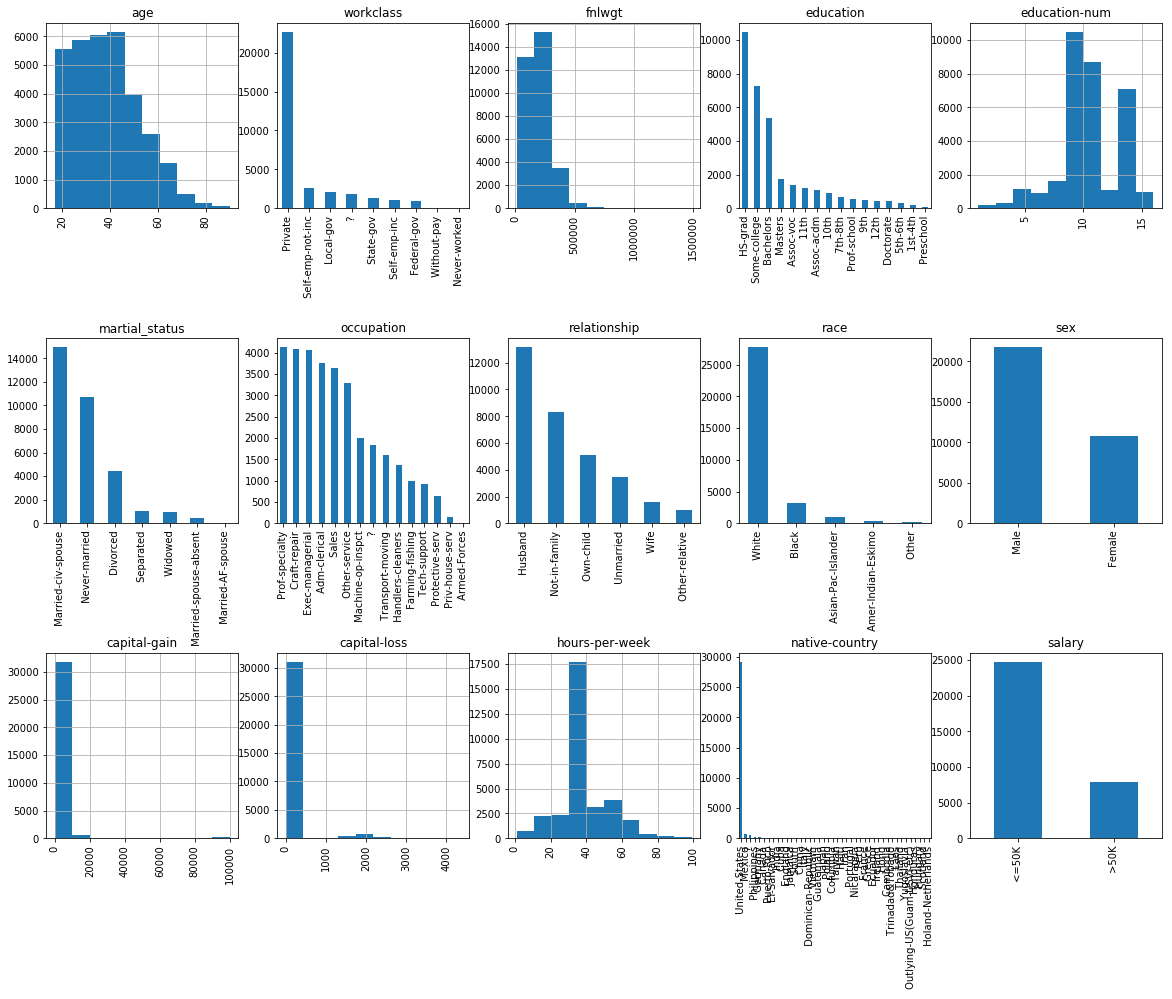

In [40]:


import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)



In [41]:
(df["native-country"].value_counts() / df.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004207
Name: native-country, dtype: float64

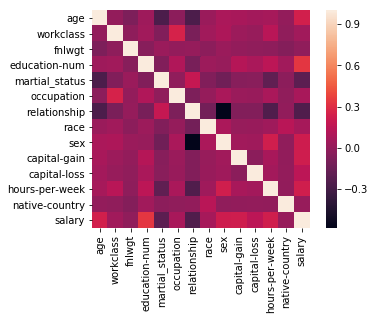

In [42]:
#let’s explore something else. The correlation between the different features. Generally it is not a good idea to have many correlated features, as it might be a sign that your data is not very good.
#For this purpose we will need to encode the categorical features as numbers.


# Encode the categorical features as numbers
def number_encode_features(data):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
ed, _ = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [43]:
df[["education", "education-num"]].head(15)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [44]:
#As you can see these two columns actually represent the same features, 
#but encoded as strings and as numbers. We don’t need the string representation, 
#so we can just delete this column. 
#Note that it is a much better option to delete the Education column as the Education-Num has the important property that the values are ordered:
#the higher the number, the higher the education that person has. 
#This is a vaulable information a machine learning algorithm can use.


del df["education"]

In [45]:
df.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df[["sex", "relationship"]].head(15)

,sex,relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


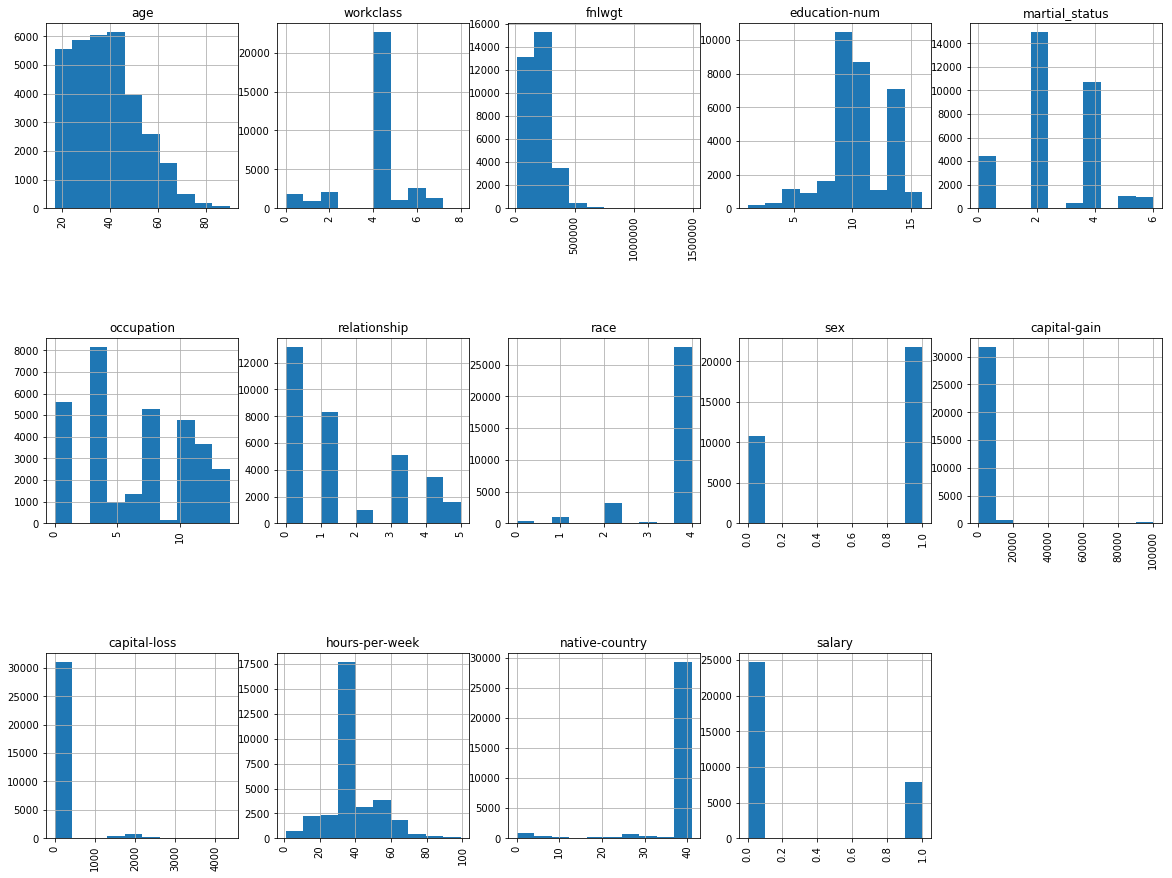

In [47]:
#First we need to encode the features as numbers as the classifiers cannot work with string features.
#As we saw a while ago this can be achieved easily with the function we defined earlier.
#Let’s encode the data and show the histograms of the values again.

ed, encoders = number_encode_features(df)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(ed.shape[1]) / cols)
for i, column in enumerate(ed.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [51]:
ed.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


## Split and Scale the features

In [53]:
ed_normalized = ed.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [54]:
ed_normalized.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,0.875,0.044302,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


In [57]:
ed_normalized.salary.value_counts()

0.0    24720
1.0     7841
Name: salary, dtype: int64

In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X=ed_normalized.drop(['salary'],axis=1)
y=ed_normalized['salary']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70)

## Applying Xgboost Model and compating with Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()

In [68]:
from sklearn.metrics import accuracy_score
m1.fit(X_train,y_train)
print(accuracy_score(y_test,m1.predict(X_test)))


0.827720339851


In [69]:
m2=XGBClassifier(n_estimator=50)
m2.fit(X_train,y_train)
print(accuracy_score(y_test,m2.predict(X_test)))

0.864878697922


In [70]:
## checking with AdaBOOSTClassifier
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed =7
num_trees= 30
kfold = model_selection.KFold(n_splits=10,random_state=seed)
model= AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.855410044817


In [71]:
# Checking with Gradient Boost Classifier

import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed =7
num_trees= 100
kfold = model_selection.KFold(n_splits=10,random_state=seed)
model= GradientBoostingClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.865207068653


In [72]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [73]:
y_pred=model.predict(X_test)

In [74]:
predictions=[round(value) for value in y_pred]

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
eval_set=[(X_test,y_test)]

In [77]:
model.fit(X_train,y_train,early_stopping_rounds=5,eval_metric='auc',eval_set=eval_set,verbose=True)

[0]	validation_0-auc:0.84771
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.84771
[2]	validation_0-auc:0.848625
[3]	validation_0-auc:0.849348
[4]	validation_0-auc:0.855912
[5]	validation_0-auc:0.857532
[6]	validation_0-auc:0.857524
[7]	validation_0-auc:0.877283
[8]	validation_0-auc:0.882324
[9]	validation_0-auc:0.886512
[10]	validation_0-auc:0.886478
[11]	validation_0-auc:0.891925
[12]	validation_0-auc:0.893686
[13]	validation_0-auc:0.895029
[14]	validation_0-auc:0.89555
[15]	validation_0-auc:0.896561
[16]	validation_0-auc:0.896941
[17]	validation_0-auc:0.897942
[18]	validation_0-auc:0.898477
[19]	validation_0-auc:0.898933
[20]	validation_0-auc:0.901081
[21]	validation_0-auc:0.901464
[22]	validation_0-auc:0.9019
[23]	validation_0-auc:0.902411
[24]	validation_0-auc:0.902519
[25]	validation_0-auc:0.903939
[26]	validation_0-auc:0.904179
[27]	validation_0-auc:0.905344
[28]	validation_0-auc:0.905793
[29]	validation_0-auc:0.90616
[30]	validation_0-auc:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [79]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.86487869792199812

In [80]:
print(model.feature_importances_)

[ 0.13994169  0.03498542  0.07580175  0.12536444  0.06851312  0.08163265
  0.07434402  0.01457726  0.01749271  0.15889212  0.11516035  0.08017493
  0.01311953]


## accuracy with XGboost is 86.5% and with logisitc is 82.7%